# Metodología para clasificación
### Aprendizaje Automático - Instituto de Computación - UdelaR


## Metodología para clasificación

- Indepedientemente del método utilizado, existen etapas comunes para poder hacer aprendizaje supervisado (en particular, clasificación).

- ¿Cuál es nuestra tarea?: dado un conjunto $X$ de instancias independientes con una cierta distribución $D$, cada una de ellas con una clase $y$ asociada, queremos construir una función de clasificación que, dada una instancia nueva, nos devuelva su clase.  

- Algunas preguntas: ¿cómo aprendo la función?, ¿sobre qué instancias?, ¿cómo evalúo la performance de la función?

<img src="https://raw.githubusercontent.com/pln-fing-udelar/curso_aa/master/img/clasificador.png" alt="Drawing" width="400"/>


## Fase 1: Preprocesamiento

-  Vamos a suponer que, para poder entrenar un clasificador, debemos partir de un conjunto $D = \{(x_i,y_i)\}$, llamado conjunto de entrenamiento, donde cada instancia $x_i \in \mathbb{R}^n$ y $y_i \in \mathbb{R}$ (no todos los algoritmos de aprendizaje necesitan este formato de entrada, es solamente para fijar ideas)

- (Des) afortunadamente, los conjuntos de datos que generalmente disponemos surgen de sensores, datos ingresados por humanos, fuentes diferentes, etc. Por lo tanto, debemos limpiarlos (_data cleaning_).

- El formato de los datos originales puede ser diverso: elementos de un conjunto (categóricos), fechas, textos, imágenes, etc. Debemos buscar formas para convertirlos a un formato aceptable por el algoritmo (_data transformation_).

- Nuestros datos pueden venir de diferentes fuentes, debemos integrarlos (_data integration_)

- Puede que, para ser más eficientes en los tiempos de aprendizaje, sea necesario agrupar datos, eliminar atributos o reducir el numero de instancias, buscando no perder infromación (_data reduction_)

![Data Preprocessing](https://miro.medium.com/max/628/1*d1P90NT33rRKlJT7opFO8w.png)

Fuente de la imgen: [Data Preprocessing](https://medium.com/@silicon.smile1/data-preprocessing-b1552b4060f3) - Umar Farooq 

#### Titanic

Trabajaremos con  un ejemplo utilizando pandas (ya que estamos, importamos otras bibliotecas que probablemente utilicemos). 
- Titanic Dataset: listado de pasajeros del Titanic, indicando si sobrevivieron o no. Más detalles [aquí](https://www.kaggle.com/c/titanic). 

In [29]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing
import sklearn.feature_selection
pd.options.mode.chained_assignment = 'warn'  # default='warn'
import graphviz


In [30]:
titanic=pd.read_csv('https://raw.githubusercontent.com/pln-fing-udelar/curso_aa/master/data/titanic.csv')
titanic

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


### Conjunto de entrenamiento y Testeo. Accuracy (Spoiler)

<img src="https://miro.medium.com/max/1940/1*Nv2NNALuokZEcV6hYEHdGA.png" alt="Drawing" width=400 />


- Separación inicial: conjunto de entrenamiento y de evaluación. 

- Cuantas  más instancias para entrenar tengamos, probablemente mejor será nuestro modelo, PERO...

- Cuantas más intancias para evaluar tengamos, menor será la varianza de nuestros resultados.

- Usualmente se divide como 80%-20%, o 70%-30%

- Accuracy: proporción de las instancias del conjunto de evaluación que nuestro modelo clasifica correctamente

Fuente de la imagen: [About Train, Validation and Test Sets in Machine Learning](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7) - Tarang Shah

### Titanic: división del conjunto de entrenamiento

In [31]:
# Primero separamos las X de las y. 
titanic_X = titanic.drop(['survived'], axis=1, inplace=False)
titanic_y = titanic[['survived']]

# Construimos los corpus de entrenamiento y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.25, random_state=33)

display(X_train.shape)
display(X_test.shape)


(984, 10)

(329, 10)

### Valores faltantes


- ¿qué hacemos si algún atributo de alguna instancia no tiene asignado un valor?

- Opción 1: eliminar instancias. Problema: reduce el dataset.

- Opción 2: asignar un valor especial (UNK, -1, 0, etc). Esto indica que, si faltan datos, quiere decir algo. 

- Opción 3: asignar el valor medio (o la mediana, o la moda) del atributo en el conjunto de entrenamiento

- Opción 4: asignar según el método de aprendizaje que estemos utilizando (e.g. lo visto en Árboles de Decisión)

Observación: estos cambios aplican a todo el dataset, pero cualquier cálculo de estadística debe hacerse sobre el conjunto de entrenamiento 

- Algunos detalles en Python: [How to handle missing data with Python](https://machinelearningmastery.com/handle-missing-data-python/) - Jason Brownlee


### Titanic: atributos faltantes

Sustiuimos las edades que nos faltan por el promedio

In [32]:
X_train

,row.names,pclass,name,age,embarked,home.dest,room,ticket,boat,sex
1086,1087,3rd,"Olsen, Master Arthur",NaN,NaN,NaN,NaN,NaN,NaN,male
12,13,1st,"Aubert, Mrs Leontine Pauline",NaN,Cherbourg,"Paris, France",B-35,17477 L69 6s,9,female
1036,1037,3rd,"Moubarek, Master William George",NaN,NaN,NaN,NaN,NaN,NaN,male
833,834,3rd,"Gronnestad, Mr Daniel Danielsen",32.0,Southampton,"Foresvik, Norway Portland, ND",NaN,NaN,NaN,male
1108,1109,3rd,"Paulsson, Master Gosta Leonard",NaN,NaN,NaN,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...
1225,1226,3rd,"Stankovic, Mr Jovan",NaN,NaN,NaN,NaN,NaN,NaN,male
658,659,3rd,"Baclini, Miss Helene",NaN,Cherbourg,"Syria New York, NY",NaN,NaN,NaN,female
578,579,2nd,"Watt, Miss Bertha",12.0,Southampton,"Aberdeen / Portland, OR",NaN,NaN,9,female
391,392,2nd,"Dibden, Mr William",18.0,Southampton,"New Forest, England",NaN,NaN,NaN,male


In [33]:
# Contamos cuántos NaN son
print("Cantidad de instancias sin valor: {0}".format(X_train['age'].isnull().sum()))

# Vemos el promedio de edad de los sobrevivientes, según la clase
mean_age=X_train["age"].mean()
display('Valor de mean_age:'+str(mean_age))

# Actualizamos con la mean_age de cada grupo tanto entrenamiento como evaluación
X_train.loc[X_train['age'].isnull(),'age']=mean_age
X_test.loc[X_test['age'].isnull(),'age']=mean_age



Cantidad de instancias sin valor: 517


'Valor de mean_age:31.02962141327623'

In [34]:
X_train

,row.names,pclass,name,age,embarked,home.dest,room,ticket,boat,sex
1086,1087,3rd,"Olsen, Master Arthur",31.029621,NaN,NaN,NaN,NaN,NaN,male
12,13,1st,"Aubert, Mrs Leontine Pauline",31.029621,Cherbourg,"Paris, France",B-35,17477 L69 6s,9,female
1036,1037,3rd,"Moubarek, Master William George",31.029621,NaN,NaN,NaN,NaN,NaN,male
833,834,3rd,"Gronnestad, Mr Daniel Danielsen",32.000000,Southampton,"Foresvik, Norway Portland, ND",NaN,NaN,NaN,male
1108,1109,3rd,"Paulsson, Master Gosta Leonard",31.029621,NaN,NaN,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...
1225,1226,3rd,"Stankovic, Mr Jovan",31.029621,NaN,NaN,NaN,NaN,NaN,male
658,659,3rd,"Baclini, Miss Helene",31.029621,Cherbourg,"Syria New York, NY",NaN,NaN,NaN,female
578,579,2nd,"Watt, Miss Bertha",12.000000,Southampton,"Aberdeen / Portland, OR",NaN,NaN,9,female
391,392,2nd,"Dibden, Mr William",18.000000,Southampton,"New Forest, England",NaN,NaN,NaN,male


### Atributos categóricos

- Los atributos categóricos son atributos cuyos valores pertenecen a un conjunto discreto y finito (y, a veces, no numérico) 

- Opción 1: Cuando tenemos $n$ etiquetas, convertir a valores enteros en el rango $[0.. n-1]$. Problema: sigue siendo discreto, e induce un orden entre las etiquetas. Lo primero puede puede perjudicar a algoritmos que asumen valores continuos, lo segundo puede no representar la realidad.

- Opción 2: one-hot-encoding. Creamos tantos atributos nuevos como etiquetas diferentes haya.  En cada instancia, si el valor del atributo original es $i$, el atributo correspondiente al $i$-ésimo valor valdrá 1, y el resto valdrán 0.

### Titanic: codificación de atributos categóricos



In [35]:
# Creamos un labelEncoder utilizando scikit-learn
le=sklearn.preprocessing.LabelEncoder()
# Obtenemos las clases a partir de los valores del conjunto de entrenamiento
le.fit(titanic['sex'])
# Mostramos las clases obtenidas
le.classes_
# Ajustamos el campo sex, transformándolo

X_train['sex'] = le.transform(X_train['sex'])
X_test['sex'] = le.transform(X_test['sex'])

In [27]:
X_train

,row.names,pclass,name,age,embarked,home.dest,room,ticket,boat,sex
1086,1087,3rd,"Olsen, Master Arthur",31.029621,NaN,NaN,NaN,NaN,NaN,1
12,13,1st,"Aubert, Mrs Leontine Pauline",31.029621,Cherbourg,"Paris, France",B-35,17477 L69 6s,9,0
1036,1037,3rd,"Moubarek, Master William George",31.029621,NaN,NaN,NaN,NaN,NaN,1
833,834,3rd,"Gronnestad, Mr Daniel Danielsen",32.000000,Southampton,"Foresvik, Norway Portland, ND",NaN,NaN,NaN,1
1108,1109,3rd,"Paulsson, Master Gosta Leonard",31.029621,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
1225,1226,3rd,"Stankovic, Mr Jovan",31.029621,NaN,NaN,NaN,NaN,NaN,1
658,659,3rd,"Baclini, Miss Helene",31.029621,Cherbourg,"Syria New York, NY",NaN,NaN,NaN,0
578,579,2nd,"Watt, Miss Bertha",12.000000,Southampton,"Aberdeen / Portland, OR",NaN,NaN,9,0
391,392,2nd,"Dibden, Mr William",18.000000,Southampton,"New Forest, England",NaN,NaN,NaN,1


In [36]:
# Utilizamos scikit-learn para crear un one-hot-encoder
ohe=sklearn.preprocessing.OneHotEncoder(sparse_output=False)

# Obtenemos las categorías a partir de los datos de entrenamiento
# Observemos que aquí utilizo todo el dataset, porque la decisión no involucra el aprendizaje
ohe.fit(titanic['pclass'].to_numpy().reshape(-1,1))
display(ohe.categories_)

# Obtenemos los nuevos valores a partir del valor original
new_train=ohe.transform(X_train['pclass'].to_numpy().reshape(-1,1))
new_test =ohe.transform(X_test['pclass'].to_numpy().reshape(-1,1))


# Creamos nuevos atributos
X_train['class_1st']=new_train[:,0]
X_train['class_2nd']=new_train[:,1]
X_train['class_3rd']=new_train[:,2]
X_test['class_1st']=new_test[:,0]
X_test['class_2nd']=new_test[:,1]
X_test['class_3rd']=new_test[:,2]


[array(['1st', '2nd', '3rd'], dtype=object)]

In [12]:
X_train

,row.names,pclass,name,age,embarked,home.dest,room,ticket,boat,sex,class_1st,class_2nd,class_3rd
1086,1087,3rd,"Olsen, Master Arthur",31.029621,NaN,NaN,NaN,NaN,NaN,male,0.0,0.0,1.0
12,13,1st,"Aubert, Mrs Leontine Pauline",31.029621,Cherbourg,"Paris, France",B-35,17477 L69 6s,9,female,1.0,0.0,0.0
1036,1037,3rd,"Moubarek, Master William George",31.029621,NaN,NaN,NaN,NaN,NaN,male,0.0,0.0,1.0
833,834,3rd,"Gronnestad, Mr Daniel Danielsen",32.000000,Southampton,"Foresvik, Norway Portland, ND",NaN,NaN,NaN,male,0.0,0.0,1.0
1108,1109,3rd,"Paulsson, Master Gosta Leonard",31.029621,NaN,NaN,NaN,NaN,NaN,male,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,3rd,"Stankovic, Mr Jovan",31.029621,NaN,NaN,NaN,NaN,NaN,male,0.0,0.0,1.0
658,659,3rd,"Baclini, Miss Helene",31.029621,Cherbourg,"Syria New York, NY",NaN,NaN,NaN,female,0.0,0.0,1.0
578,579,2nd,"Watt, Miss Bertha",12.000000,Southampton,"Aberdeen / Portland, OR",NaN,NaN,9,female,0.0,1.0,0.0
391,392,2nd,"Dibden, Mr William",18.000000,Southampton,"New Forest, England",NaN,NaN,NaN,male,0.0,1.0,0.0


In [37]:
# Elminamos atributos que no vamos a utilizar para el aprendizaje
# Esto podríamos afinarlo usando Feature Selection
X_train.drop(['row.names','pclass', 'name', 'embarked', 'home.dest', 'room', 'ticket', 'boat'], axis=1, inplace=True)
X_test.drop(['row.names','pclass', 'name', 'embarked', 'home.dest', 'room', 'ticket', 'boat'], axis=1, inplace=True)

X_train

,age,sex,class_1st,class_2nd,class_3rd
1086,31.029621,1,0.0,0.0,1.0
12,31.029621,0,1.0,0.0,0.0
1036,31.029621,1,0.0,0.0,1.0
833,32.000000,1,0.0,0.0,1.0
1108,31.029621,1,0.0,0.0,1.0
...,...,...,...,...,...
1225,31.029621,1,0.0,0.0,1.0
658,31.029621,0,0.0,0.0,1.0
578,12.000000,0,0.0,1.0,0.0
391,18.000000,1,0.0,1.0,0.0


### Ingeniería de atributos - Textos

- Método tradicional: Bag of Words (BOW): a partir de un vocabulario (lista de palabras del lenguaje), 
construimos un vector con un atributo por palabra. Valores que toma:

    - 1/0: 1 indica que la palabra existe en el texto, 0 que no. 
    - Cantidad de ocurrencias de la palabra en el texto (eventualmente normalizada, dividiendo sobre el total de palabras del documento)
    - tf-idf: pondera la frecuencia de la palabra viendo qué tan común es en general (un valor alto indica que la palabra es común en el texto de la instancia, pero rara en el dataset).
    
        - $ tf  = \frac{count}{total}$, siendo $count$ el número de ocurrencias de la palabra en el texto, y $total$ el número total de palabras en el texto
        - $ idf = \log\frac{N}{n}$, siendo $N$ el número de instancias del conjunto, y $n$ el número de instancias donde la palabra aparece en el texto
        - $tf.idf = td \times idf$


### Ingeniería de atributos - Textos

Ejercicio: supongamos que la palabra "the" aparece en 98 de 100 documentos (instancias), y en mi instancia aparece 9 veces (el documento tiene 200 palabras). Análogamente "computer" aparece 3 veces en mi texto, y en 8 de 100 instancias. Construya los vectores según los criterios descritos. El total de palabras distintas en el corpus es 850, pero solamente vamos a utilizar las 300 más comunes (es decir que el vector de cada instancia tendrá 300 elementos). 
- Valor para la posición correspondiente a la palabra "the":
    - Si usamos 1/0: 1 (la palabra aparecen en la instancia)
    - Si usamos cant. ocurrencias: 9
    - Si usamos cant. ocurrencias, normalizado: 9/200 = 0.045
    - Si usamos tf-idf: $\frac{9}{200} \cdot \log \frac{100}{98} = 9.09 \times 10^{-4}$

- Valor para la posición correspondiente a la palabra "computer":
    - Si usamos 1/0: 1 (la palabra aparecen en la instancia)
    - Si usamos cant. ocurrencias: 3
    - Si usamos cant. ocurrencias, normalizado: 3/200 = 0.015
    - Si usamos tf-idf: $\frac{3}{200} \cdot \log \frac{100}{8} = 0.037$

### Ingeniería de atributos - Textos

- Antes de crear los vectores, es usual preprocesar el texto: dividir en tokens, eliminar palabras muy comunes (stop words), hacer lematización (buscar representantes comunes a varias palabras relacionadas). 
- El enfoque BOW no tiene en cuenta el orden de las palabras. Una mejora: en vez de palabras, contar n-gramas (secuencias de n palabras). A este enfoque se lo llama también bag-of-ngrams.
- Podemos imaginar a una representación de conteo normalizado BOW como una suma de vectores one-hot-encoded, uno por cada palabra, donde en la posición de la palabra está el valor correspondiente al conteo, y el resto de las posiciones son 0.  

$$
x = \frac{1}{|D|}\sum_{i=1}^{|D|} x^{D_{[i]}}
$$



### Ingeniería de atributos - Textos

- Problemas de las representaciones anteriores: son muy dispersas (en cada instancia hay muchos atributos con valor 0). No hay noción de similaridad entre palabras, si nuestra base de representación para una palabra es un one-hot-encoding.
- Hoy prácticamente todos los métodos en el estado del arte utilizan _word embeddings_: se generan vectores densors de baja dimensionalidad (50-200 atributos), y con algunas propiedades interesantes, a partir del contexto en el que aparece cada palabra usualmente. 


Si quieren saber más sobre textos y cómo procesarlos, pueden hacer el curso [Introducción al Procesamiento del Lenguaje Natural](https://eva.fing.edu.uy/course/view.php?id=211), o [Redes Neuronales para Lenguaje Natural](https://eva.fing.edu.uy/course/view.php?id=1758) dictado en esta misma institución, por este mismo grupo de investigación.

### Estandarización de atributos

- Muchos algoritmos en aprendizaje automático (e.g. knn, redes neuronales, PCA) se benefician de que los atributos continuos tengan aproximadamente el mismo orden de magnitud. Esto se debe, por ejemplo, a que se utiliza la distancia euclidiana y se busca que todos los atributos "pesen" igual al calcularla. En el caso de algoritmos que utilizan descenso por gradiente, puede haber mucha diferencia en performance. 

- Min-max scaling: este escalado deja los valores en el rango $[0-1]$. Dado un valor $x$, obtenemos:

    $ x_s = \frac{x - x_{min}}{x_{max} - x_{min}}$
    
    siendo $x_{min}$ y $x_{max}$ los valores mínimo y máximo respectivamente en el dataset
    
- Normalización: se escalan los atributos para que tengan las propiedades de una distribución normal estándar, con $\mu = 0$ y $\sigma = 1$. 

    $ x_{norm} = \frac{x_i - \mu_{i}}{s_i} $
    
    siendo $\mu_{i}$ la media y  $s_i$ la desviación estándar de la muestra.
    
    
 

Ejercicio: normalice los siguientes valores utilizando los dos métodos anteriores: $\{85,35,42,8,15, 22\}$. ¿En qué rango quedan los valores obtenidos por normalización?

- Valor mínimo: 8
- Valor máximo: 85
- Valores escalados min-max: {1,0.35, 0.44, 0, 0.09, 0.18}



- Media: $\frac{85+35+42+8+15+22}{6} = 34.50 $
- Desviación estándar: $\sqrt{(85 -34.5)^2 + \ldots + (22 - 34.5)^2} = 25.32$
- Valores normalizados: $\{ 1.99,  0.02,  0.3,  -1.05, -0.77, -0.49\}$

(Verifique que los nuevos valores tienen media 0 y desviación estándar 1)

- Lectura: [About standarization](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html) - Sebastian Rashcka
- Nota: la estandarización, así como la selección de los atributos, debe hacerse durante el entrenamiento (no antes). Véase [este link](https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation) por más detalles.



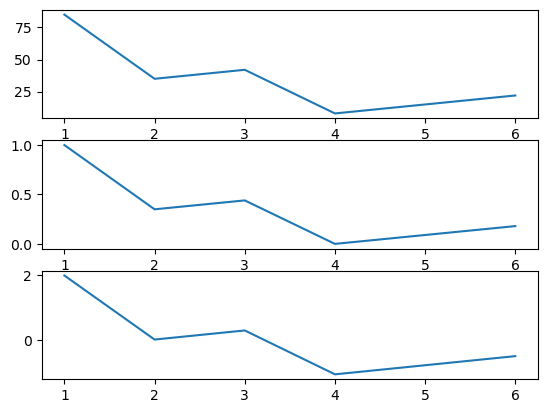

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6]
valores = np.array([85,35,42,8,15,22])

valores_escalados = np.array([1,0.35,0.44,0,0.09,0.18])

valores_estandarizados = np.array([1.99,0.02,0.3,-1.05,-0.77,-0.49])

fig, axs = plt.subplots(3)
axs[0].plot(x, valores)
axs[1].plot(x, valores_escalados)
axs[2].plot(x, valores_estandarizados)



## Fase 2: División del Conjunto de Datos

### Conjunto de entrenamiento, testeo, [y validación]


- Debemos asegurar, para evitar el sobreajuste (_overfitting_), que la evaluación del modelo se realice en un conjunto de datos distinto a aquel sobre el cual se entrenó. 

- Sobreajuste: nuestro modelo tiene buen rendimiento sobre el dataset de entrenamiento, pero sus resultados son muy inferiores cuando se encuentra a datos no vistos previamente. Causa probable: el modelo está memorizando los datos de entrenamiento, sin poder generalizar. 

- Si evaluamos sobre el mismo conjunto de datos sobre el que entrenamos, no podemos saber si estamos sobreajustando. **Sobreajustar es el peligro mayor cuando hacemos aprendizaje automático**

### Conjunto de entrenamiento, testeo, [y validación]

<img src="https://www.researchgate.net/publication/339680577/figure/fig2/AS:865364518924290@1583330387982/llustration-of-the-underfitting-overfitting-issue-on-a-simple-regression-case-Data.png" alt="Drawing" width=600 />


[Ejemplo COVID-19 en Uruguay](https://github.com/gmonce/datascience/blob/master/src/Sobreajustando.ipynb)

### Conjunto de entrenamiento, testeo, [y validación]

<img src="https://vitalflux.com/wp-content/uploads/2020/12/overfitting-and-underfitting-wrt-model-error-vs-complexity.png" alt="Drawing" width=400 />



### Conjunto de entrenamiento, testeo, [y validación]

<img src="https://miro.medium.com/max/1940/1*Nv2NNALuokZEcV6hYEHdGA.png" alt="Drawing" width=400 />


- Separación inicial: conjunto de entrenamiento y de evalución. 

- Cuantas  más instancias para entrenar tengamos, probablemente mejor será nuestro modelo, PERO...

- Cuantas más intancias para evaluar tengamos, menor será la varianza de nuestros resultados.

- Usualmente se divide como 80%-20%, o 70%-30%

Fuente de la imagen: [About Train, Validation and Test Sets in Machine Learning](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7) - Tarang Shah

### Conjunto de validación

- Si queremos ajustar los parámetros del modelo (lo veremos en breve), no es conveniente hacerlo en el conjunto de evaluación (ya que podríamos estar sobreajustando, nuevamente). 

- Opción 1: separar una parte del conjunto de entrenamiento para utilizarlo en esa etapa

- Opción 2: utilizar validación cruzada (cross-validation)

### Estratificación

- Aunque no queremos que la evaluación se realice en el conjunto de entrenamiento, sí nos interesa que la distribución de los ejemplos en uno y otro sea similar.

- Al hacer la división de los conjuntos, lo usual es elegir las instancias al azar, para evitar que las agrupaciones u ordenamientos presentes en el conjunto original puedan dar lugar a distribuciones distintas. 

- Un paso más, especialmente importante cuando las clases objetivo están _desbalanceadas_ (es decir, hay muchos más ejemplos de una clase que de otras), es estratificar: elegir las instancias en cada una de las subclases, obligando a que la proporción sea la misma en el corpus de entrenamiento y en el de evaluación.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Stratified_sampling.PNG/440px-Stratified_sampling.PNG" alt="Drawing" width="300" />



### Conjuntos de datos desbalanceados

- Los conjuntos de datos donde el número de instancias de cada clase son muy diferentes, nos traen problemas para el aprendizaje, ya que un método que favorezca a la clase mayoritaria generalmente tendrá "buenos resultados" en términos de _accuracy_

<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_001.png" alt="Drawing" width="400" />

(Fuente de la imagen: User guide de la biblioteca imbalanced-learn)


### Conjuntos de datos desbalanceados: Oversampling

- Oversampling: generar nuevas instancias de la clase minoritaria para equilibrar la cantidad de instancias de cada clase

- Random oversampling: muestreo con repetición instancias de la clase minoritaria



### Conjuntos de datos desbalanceados: Oversampling

- SMOTE: genero instancias "sintéticas" a partir de los vecinos más cercanos.
    - Dado $x_i$, considero sus k vecinos más cercanos y elijo uno ($x_{zi}$) y genero una nueva instancia $x_{new} = x_i + \lambda (x_{zi} - x_i)$
    - Existen variantes de SMOTE que, por ejemplo, genera solamente a partir de instancias "en peligro" (al menos la mitad de los vecinos son de otra clase). 

<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_generation_sample_001.png" alt="Drawing" width="300" />

### Conjuntos de datos desbalanceados: Undersampling

- Undersampling: reducir la cantidad de instancias de la clase mayoritaria

- Random undersampling: elegir un subjconjunto aleatorio de instancias (Prototype Selection)

- Nearmiss: elegir las instancias más cercanas a las de la clase minoritaria utilizando el algoritmo de vecinos más cercanos  (Prototype Selection)

<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_nearmiss_001.png" alt="Drawing" width="300" />


- Mas info: imbalanced-learn User guide


### Conjuntos de datos desbalanceados: Undersampling

- ClusterCentroids: dividir las instancias de la clase mayoritaria en N clusters y utilizar los centroides como nuevos instancias (Prototype generation)

<img src="https://miro.medium.com/max/1400/1*EaLiJ5afqPgp9DUU9ykNCg.png" alt="Drawing" width="500" />


- Mas info: imbalanced-learn User guide

### Selección de atributos

- Luego de que tenemos atributos "candidatos", nos gustaría quedarnos con aquellos que "valen la pena" para la tarea de clasificación que intentamos hacer. No hay una definición obvia de "vale la pena", pero nos interesan (para evitar ruido, y también por razones de eficiencia computacional) aquellos atributos que, en conjunto, sirvan para mejorar nuestra predicción. 

- El objetivo de la selección de atributos es eliminar atributos que son irrelevantes o redundantes. Por ejemplo: si tenemos dos atributos con valores idénticos, podemos eliminar uno de ellos. O si un atributo tiene siempre el mismo valor. O, por el contrario, todos sus valores son diferentes (en este caso, servirá como predictor perfecto de la clase objetivo si lo memorizamos, pero seguramente su capacidad de generalización será nula).


### Selección de atributos - Métodos de filtrado

- Este tipo de métodos intentan evaluar (por separado) qué tan bueno es cada atributo. 

- Una forma muy básica: seleccionar los atributos que superan cierto valor de varianza. Se basa en la idea de que los atributos que valen siempre lo mismo seguramente no sean buenos predictores. Defecto: no utilizan la clase objetivo.  

- $ \chi^2$ (chi-squared): cuando tenemos dos variables categóricas, podemos utilizar este método para estimar, a partir de los valores observadores y los esperados, si las dos variables son independientes. Cuanto mayor es el valor, mayor su correlación. Por lo tanto, podemos utilizar esta medida para obtener los atributos más correlacionados con la clase objetivo (y que, por lo tanto, deberían ser mejores predictores).


- Ganancia de información: la ganancia de información, o información mutua de dos variables aleatorias es una medida (proveniente de la teoría de la información) que indica qué tanto podemos saber de una de ellas conociendo la otra, es decir qué tan dependientes son entre sí. Vale 0 sí y solo sí ambas variables son independientes. Por lo tanto, esta medida puede ser utilizada en forma análoga al test $ \chi^2$ para eliminar atributos independientes de la clase objetivo.

### Selección de atributos - Métodos _wrappers_

- Este tipo de métodos de selección utilizan un método de aprendizaje para evaluar diferentes combinaciones de atributos y seleccionar la que obtenga mejores resultados sobre un dataset heldout separado, o vía cross-validation. Para que funcionen, el método debe ser capaz de asignar un valor de importancia a cada atributo, luego de entrenado el modelo. 

- Por ejemplo, el método de **eliminación recursiva de atributos** parte del conjunto inicial de atributos y, aplicando un método de aprendizaje (por ejemplo, árboles de decisión) sobre un conjunto de validación, elimina aquellos atributos menos importantes. Se repite el proceso hasta llegar a un cierto número de atributos deseados. 

### Selección de atributos - Métodos _embedded_

- A diferencia de los anteriores, la selección de atributos es realizada por el mismo algoritmo de aprendizaje, durante el proceso de entrenamiento.

- Un ejemplo ya visto en el curso es el de la selección de atributos que realizan los árboles de decisión.

- Otro ejemplo, que veremos más adelante en el curso, son los métodos de regularización, que buscan generar modelos más "sencillos", para evitar el sobreajuste.

Lectura: [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/) - Jason Brownlee

## Fase 3: Entrenamiento

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" alt="Drawing" width=400/>


### Entrenamiento

- Durante el entrenamiento, utilizamos los datos del conjunto de entrenamiento, y un algoritmo de aprendizaje, para generar un clasificador.

- Una vez generado el modelo, lo evaluamos en el conjunto de evaluación para obtener una medida de su performance (veremos más adelante las principales medidas utilizadas).

- Los algoritmos de entrenamiento tienen usualmente hiperparámetros que deberían ajustarse (e.g. profundidad máxima de un árbol en los árboles decisión). Usualmente lo que se hace es probar diferentes valores para cada parámetro y ver cuál obtiene mejores resultados. Como no queremos hacer esto sobre el corpus de evaluación (¿por qué?), utilizamos un subconjunto del corpus de entrenamiento, el corpus de validación (o corpus held-out). 

### Titanic: entrenamiento


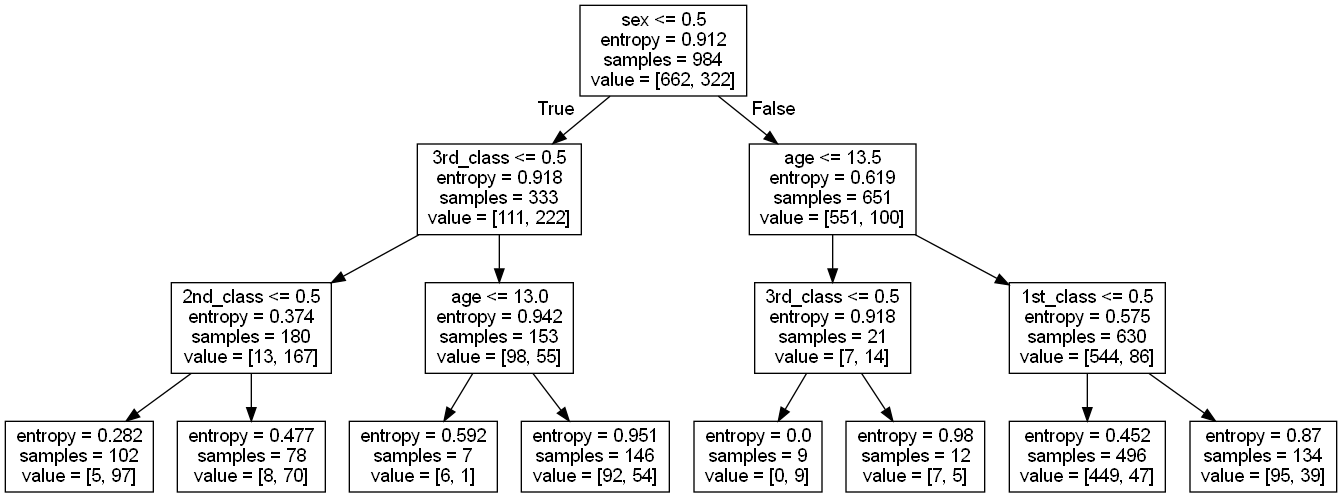

In [49]:
from IPython.display import Image, display

# Vamos a entrenar un árbol de decisión sobre los datos de entrenamiento
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3 , min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

dot_code=tree.export_graphviz(clf, feature_names=['age','sex','1st_class','2nd_class','3rd_class'])

tree = graphviz.Source(dot_code)

tree.render(filename='titanic', format='png')
display(Image(filename='titanic.png'))

### Validación cruzada y selección de modelos

- Para utilizar mejor el corpus de entrenamiento y no tener que separar datos para validación, una alternativa es realizar validación cruzada. Este método, además, permite disminuir la varianza de los resultados (ya que se obtiene como el promedio de varias evaluaciones), aunque es más costoso en términos de tiempo de entrenamiento.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Drawing" width=400/>



### Validación cruzada y selección de modelos


- En la validación cruzada, se divide el dataset de entrenamiento en k partes, y se utilizan (k-1) partes para entrenar, y la restante para evaluar el modelo. Este proceso se repite cambiando la parte elegida. 

- Se devuelve el promedio del valor de performance obtenido, y también la desviación estándar de los resultados.

<img src="http://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" alt="Drawing" width=400/>

Fuente de las imágenes anteriores y lectura recomendada: [Cross-validation: evaluating estimator performance¶](https://scikit-learn.org/stable/modules/cross_validation.html)


### Titanic: ajuste de parámetros

In [40]:
from sklearn import metrics
import scipy.stats

# Hacemos cross validation para encontrar la mejor profundidad para el árbol
for md in range(10):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md+1 , min_samples_leaf=5)
    kf=sklearn.model_selection.KFold(n_splits=5)
    scores=np.zeros(5)
    score_index=0
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_test_cv= X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv= y_train.iloc[train_index], y_train.iloc[test_index]
        clf = clf.fit(X_train_cv,y_train_cv)
        y_pred=clf.predict(X_test_cv)
        scores[score_index]=metrics.accuracy_score(y_test_cv.astype(int), y_pred.astype(int))
        score_index += 1
    print ("Profundidad {0:d}, Accuracy media: {1:.3f} (+/-{2:.3f})".format(md+1, np.mean(scores), scipy.stats.sem(scores)))

Profundidad 1, Accuracy media: 0.786 (+/-0.010)
Profundidad 2, Accuracy media: 0.833 (+/-0.013)
Profundidad 3, Accuracy media: 0.827 (+/-0.013)
Profundidad 4, Accuracy media: 0.825 (+/-0.013)
Profundidad 5, Accuracy media: 0.823 (+/-0.011)
Profundidad 6, Accuracy media: 0.825 (+/-0.012)
Profundidad 7, Accuracy media: 0.823 (+/-0.012)
Profundidad 8, Accuracy media: 0.824 (+/-0.014)
Profundidad 9, Accuracy media: 0.824 (+/-0.014)
Profundidad 10, Accuracy media: 0.826 (+/-0.014)


## Fase 4: Evaluación



- El paso final es evaluar la performance del modelo (clasificador) obtenido sobre un conjunto de datos no vistos previamente. Hasta ahora, no hemos dicho cómo medimos esa performance

- Imaginemos, en principio, un clasificador binario. 
- Supongamos que nuestras instancias de entrenamiento tienen una cierta distribución $D$, y que son independientes.

<img src="https://raw.githubusercontent.com/pln-fing-udelar/curso_aa/master/img/clasificador.png" alt="Drawing" width="400"/>



### Accuracy

- Lo más sencillo es estimar el acierto (accuracy) o el error.

<img src="https://raw.githubusercontent.com/pln-fing-udelar/curso_aa/master/img/accuracy.png" alt="Drawing" width=400 />

$$ acc_s = \frac{V_{azul} + V_{amarillo}}{V_{azul}+V_{amarillo} + F_{azul}+F_{amarillo}}$$  

$$ error_s = \frac{F_{azul} + F_{amarillo}}{V_{azul}+V_{amarillo} + F_{azul}+F_{amarillo}} = 1 - acc $$

### Accuracy

Ejemplo: tenemos 100 instancias ($n = 100$) donde evaluar una hipótesis $h$, y dos clases posibles  {1,0} (consideramos a la clase 1 como la clase positiva).

Podemos construir la siguiente tabla, llamada _matriz de confusión_:

|  A   | h(x)=1 | h(x)=0 | Total |
|-----|----------:|----------:|-------:|
| y=1 |   $48_{TP}$    | $12_{FN}$       | 60    |
| y=0 |    $5_{FP}$     | $35_{TN}$       | 40    |
|     |    53    | 47       | 100   |

Accuracy (¿cuántos casos predice h correctamente?) 

$$
\frac{TP + TN}{Total} = \frac{48+35}{100} = 0.83
$$


### Titanic: accuracy

In [41]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
    

In [42]:
# Construimos un clasificador con el mejor parámetro, y entrenamos sobre todo el conjunto de entrenamiento

clf_dt=tree.DecisionTreeClassifier(criterion='entropy', max_depth=2 ,min_samples_leaf=5)
clf_dt.fit(X_train,y_train)
measure_performance(X_test,y_test,clf_dt, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.787 



### Evaluación de hipótesis

- ¿Es el error en la muestra un buen estimador del error "real"? ¿Cuál es la probabilidad de error de este estimador? 

Primero, definamos el error cometido por una cierta hipótesis en una muestra: 

$$
error_s(h) \equiv \frac{1}{n}\Sigma \delta(y,h(x))
$$

donde $\delta(x,y)$ es 1 si los valores de $x$ y $y$ son distintos, y 0 en otro caso.

El error real es simplemente 

$$
error_D(h) \equiv P_{x \in D} (y \neq h(x))
$$

### Evaluación de hipótesis

Si 
- Nuestras hipótesis toman valores discretos
- Nuestras instancias son independientes entre sí, y de la hipótesis
- $n \geq 30$
- $error_s(h) = r/n$
- $error_s(h)$ no está demasiado cercano a 0 o 1 (Regla: $n\cdot error_s(h)(1-error_s(h))\geq 5)$

Entonces 

1. Un estimador no sesgado de $error_D(h)$ es $error_s(h)$
2. El 95% de las veces, $error_d(h)$ cae en el intervalo (llamado _intervalo de confianza_):

$$
error_s(h) \pm 1.96 \sqrt{\frac{error_s(h)(1 - error_s(h))}{n}}
$$


### Evaluación de hipótesis

Ejemplo: supongamos que nuestra hipótesis se equivoca en 12 de 40 instancias. Entonces, el intervalo de confianza 95% es: 

$$
0.3 \pm 1.96 \sqrt {\frac{0.3 \times 0.7)}{40}} = 0.3 \pm 0.14
$$

Si evaluamos sobre 4000 instancias, y nos equivocamos 1200 veces, el intervalo es: 

$$
0.3 \pm 1.96 \sqrt {\frac{0.3 \times 0.7)}{4000}} = 0.3 \pm 0.0014
$$



### Evaluación de hipótesis

¿De dónde salen esos valores? 

- Evaluar una hipótesis n veces y ver cuántas se equivoca es como tirar n veces una moneda y ver cuántas caras salen
- La distribución es una binomial
- La esperanza de una binomial es $np$, siendo $n$ el tamaño de la muestra y $p$ el valor a estimar
- La desviación estándar de una binomial es $\sigma = \sqrt{np(1-p)}$

Para una distribución binomial

$error_s(h)=r/n$, por lo que $E[error_s(h)]=p$ 

por lo que el error en la muestra es un estimador no sesgado de p. 

- Para calcular la desviación estándar, sustituimos $p$ por nuestra estimación. 


$\sigma_{error_s(h)} = \sigma_{r/n} = \sqrt{Var(r/n)} = \sqrt{\frac{1}{n^2} Var(r)}  = \frac{\sigma_r}{n} = \sqrt{\frac{p(1-p)}{n}} \approx \sqrt{\frac{error_s(h)(1-error_s(h))}{n}} $

- Para calcular el intervalo de confianza, aproximamos la binomial con una distribución normal

(Quien esté interesado en los detalles, puede consultar la sección 5.2 y 5.3 del libro de Mitchell)


### Precisión y Recuperación

- El problema con el acierto y el error es que no tienen en cuenta el
comportamiento en las distintas clases.
- Si el 99% de las instancias son azules, la función constante azul tiene
un acierto de 99%.
- Se buscan alternativas para medir por clase: precisión, recuperación (_recall_)


$$ precision = \frac{V_p} {V_p + F_p} $$

$$ recall = \frac{V_p}  {V_p+F_n} $$

 

$V_p$ indica verdaderos positivos, es decir aquellos ejemplos que fueron clasificados correctamente

$F_p$ indica falsos positivos, es decir aquellos ejemplos que fueron clasificados como positivos, pero eran negativos

$V_n$ indica verdaderos negativos

$F_n$ indica falsos negativos 



### Precisión y Recuperación

Ejemplo: tenemos 100 instancias ($n = 100$) donde evaluar una hipótesis $h$, y dos clases posibles  {1,0} (consideramos a la clase 1 como la clase positiva).

Podemos construir la siguiente tabla, llamada _matriz de confusión_:

|  A   | h(x)=1 | h(x)=0 | Total |
|-----|----------:|----------:|-------:|
| y=1 |   $48_{TP}$    | $12_{FN}$       | 60    |
| y=0 |    $5_{FP}$     | $35_{TN}$       | 40    |
|     |    53    | 47       | 100   |

Precision (¿De los que h predijo positivos, cuántos lo eran?)

$$
\frac{TP }{h(x)=1} = \frac{48}{53} = 0.91
$$


### Precisión y Recuperación

Ejemplo: tenemos 100 instancias ($n = 100$) donde evaluar una hipótesis $h$, y dos clases posibles  {1,0} (consideramos a la clase 1 como la clase positiva).

Podemos construir la siguiente tabla, llamada _matriz de confusión_:

|  A   | h(x)=1 | h(x)=0 | Total |
|-----|----------:|----------:|-------:|
| y=1 |   $48_{TP}$    | $12_{FN}$       | 60    |
| y=0 |    $5_{FP}$     | $35_{TN}$       | 40    |
|     |    53    | 47       | 100   |

Recall (¿Cuántos de los positivos pudo h predecir correctamente?)

$$
\frac{TP }{y=1} = \frac{48}{60} = 0.80
$$


### Precisión y Recuperación

¿Qué pasa si consideramos a 0 como la clase positiva? Es equivalente a repetir las medidas anteriores, pero con los números cambiados en filas y columnas.


|  A   | h(x)=1 | h(x)=0 | Total |
|-----|----------:|----------:|-------:|
| y=1 |   $35_{TP}$    | $5_{FN}$       | 40    |
| y=0 |    $12_{FP}$     | $48_{TN}$       | 60    |
|     |    47    | 53       | 100   |

Accuracy (¿cuántos casos predice h correctamente?): $\frac{TP + TN}{Total} = \frac{35+48}{100} = 0.83$     

Precision (¿De los que h predijo positivos, cuántos lo eran?): $\frac{TP }{h(x)=1} = \frac{35}{47} = 0.74$ 

Recall (¿Cuántos de los positivos pudo h predecir correctamente?): $\frac{TP }{h(x)=1} = \frac{35}{40} = 0.88$

La precisión y el recall son siempre respecto a una clase positiva, el accuracy es una medida general. 


### Medida-F
- Combinando precisión y recuperación se obtiene la medida-F (donde $\beta$ indica cuánta más importancia se le da al recall respecto a la precisión) : 

$$F_\beta = \frac{(1+ \beta^2) \cdot  precision \cdot recall}{\beta^2 \cdot precision + recall}$$

- En el caso de $F_1$, la formula queda reducida a:

$$F_1 = \frac{2 \cdot  precision \cdot recall}{ precision + recall}$$

- La medida-F es la media armónica entre precisión y recall, e intenta combinar ambas en un sólo número. 

Para una interesante discusión sobre por qué se utiliza la media armónica y no la media aritmética, sugerimos este artículo: [The truth of the F-measure](https://www.cs.odu.edu/~mukka/cs795sum09dm/Lecturenotes/Day3/F-measure-YS-26Oct07.pdf) - Yutaka Sasaki

### Medida-F


Ejercicio: complete la siguiente tabla, para una clasificación sobre 100.000 instancias


| $V_p$ | $F_p$ | $F_n$ | $V_n$ | Prec | Recall | $F_1$ | Accuracy |
| :---: |:---:  | :---: | :---: | :---: | :---: | :---: | :---: |
| 25    |   0   | 125   | 99850 | 1.00 | 0.17  | 0.29 | 0.999    |
| 50    |  100   | 100   | 99750 |0.33 | 0.33 |0.33 |0.999  | 
| 75    |   150   | 75   | 99700 | 0.33 | 0.50|0.40|0.998 |  
| 100    |   50  | 50  | 99800 | 0.67 | 0.67|0.67|0.999  |
| 150    |   100   | 0   | 99750 | 0.60 |1.00| 0.75| 0.999 |

- ¿Qué sucede con la accuracy? ¿Y con los otros valores? ¿Cuál de los clasificadores eligiría?


### Matriz de confusión

Las matrices de confusión son muy útiles para visualizar cómo se comporta una hipótesis en  problemas con varias clases. En el siguiente ejemplo (tomado de [aquí](https://www.blackhc.net/blog/2019/mnist-by-zip/)), se muestra una matriz de confusión para un clasificador de dígitos escritos a mano (que no funciona muy bien, dicho sea de paso...). En este caso, los valores fueron normalizados, esto es, varían entre 0 y 1 (¿imagina para qué?)

<img src="https://www.blackhc.net/blog/2019/mnist-by-zip/confusion_matrix_45.png" alt="Drawing" width=400/>



### Titanic: Precision, Recall, medida-F


In [43]:
# Construimos un clasificador con el mejor parámetro, y entrenamos sobre todo el conjunto de entrenamiento
measure_performance(X_test,y_test,clf_dt)

Accuracy:0.787 

Classification report
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       202
           1       0.85      0.54      0.66       127

    accuracy                           0.79       329
   macro avg       0.81      0.74      0.75       329
weighted avg       0.80      0.79      0.77       329
 

Confusion matrix
[[190  12]
 [ 58  69]] 



### Problemas multiclase

- ¿Qué sucede cuando se tiene un problema multiclase (es decir, hay más de dos categorías)?
- Las medidas anteriores siguen valiendo, si consideramos como "positivos" a las instancias que pertenecen a una clase, y "negativos" al resto (one-versus-all).



### Problemas multiclase

Supongamos que tenemos tres clases a,b,c, y la siguiente matriz de confusión: 

|  A   | h(x)=a | h(x)=b | h(x)=c | Total |
|-----|----------:|----------:|----:|-------:|
| y=a |   $20$    | $10$       | $10$ |   30    |
| y=b |    $3$     | $21$       |$6$ |  30    |
| y=c |   $0$    | $1$       | $30$ |  40    |
|     |    23   | 41  | 46     | 100   |

Accuracy (general) : $\frac{20+21+30}{100} = 0.71 $


### Problemas multiclase

Supongamos que tenemos tres clases a,b,c, y la siguiente matriz de confusión: 

|  A   | h(x)=a | h(x)=b | h(x)=c | Total |
|-----|----------:|----------:|----:|-------:|
| y=a |   $20_{TP}$    | $10_{FN}$       | $10_{FN}$ |   30    |
| y=b |    $3_{FP}$     | $21_{TN}$       |$6_{TN}$ |  30    |
| y=c |   $0_{FP}$    | $1_{TN}$       | $30_{TN}$ |  40    |
|     |    23   | 41  | 46     | 100   |

$Precision_A  : \frac{TP}{h(x)=a} = \frac{20}{23} = 0.87 $


$Recall_A$  : $\frac{TP}{y=a} = \frac{20}{30} = 0.67 $


(Ejercicio, verifique $Pr_b=0.51$, $R_b=0.7$, $Pr_c=0.65$, $R_c=0.75$)



### Problemas multiclase

- Esto nos da una medida por cada clase. Existen diferentes formas de resumir esa información:

    Se calcula la medida por clase, y luego se promedia los valores obtenidos (macro average)
    
    Se calcula la medida por clase teniendo en cuenta el aporte de instancias cada clase (micro average)
    
En el ejemplo anterior: 
- La macro-average de la precision será $ \frac{(Pr_a + Pr_b + Pr_c)}{3} = \frac{0.87 + 0.51 + 0.65}{3} = 0.67 $
- La micro-average será $ \frac{20+21+30}{23+41+46} = 0.71 $ (en un problema multiclase, la micro es igual a la accuracy!)



- Qué medida es más "útil", como toda medida, **depende de lo que queremos evaluar**:
    - La micro-average da más peso a las clases grandes en el análisis general
    - La macro-average permite evaluar mejor que tan "equilibrado" es el comportamiento de mi clasificador 
    - En lo posible, reportar ambas y analizar según mi problema
    
Lectura recomendada: [Should I make decisions based on micro-averaged or macro-averaged evaluation measures?](https://stats.stackexchange.com/questions/156923/should-i-make-decisions-based-on-micro-averaged-or-macro-averaged-evaluation-mea)


### Problemas multietiqueta


- En un problema multietiqueta, hay más de una clase asociada a cada etiqueta, como en el siguiente ejemplo

| Instancia | Clase | Predicción |
| --- |:---:  | :---: | 
| 1   | A,B   | B,C | 
| 2    | A,B,C   | A,C,D |
| 3    | A,B   | A,B |

- Se pueden calcular las medidas utilizando solamente los ejemplos de cada clase, sin importar el resto. Esto permite utilizar las medidas mencionadas anteriormente

- Se pueden aplicar otras medidas, como promediar el índice de Jaccard $IJ(A,B) = |A \cap B| / |A \cup B|$

- En el ejemplo, $IJ(1)=1/3$, $IJ(2)=1/2$, $IJ(3)=1$, y por lo tanto el índice de Jaccard promedio será $0.61$


### Variables ordinales

¿Qué pasa si queremos predecir variables ordinales (e.g. cantidad de córners de un partido)? 

<img src="https://miro.medium.com/max/860/1*ya6S6ACUoPyayveSW2iC_w.png" alt="Drawing" width=400 />

Posible estadística: accuracy_n (predecir el valor d, o hasta d+n)


### Línea base  y línea máxima

- ¿Cómo sabemos si el resultado que obtuvimos es "bueno", o "razonable"?

- El resultado depende del problema. 

- Siempre es bueno tener una línea base: una solución anterior sencilla, o un clasificador que elige siempre la clase más probable o según la distribución del conjunto de entrenamiento

- También es útil (si es posible) tener una línea de tope, sobre todo en problemas donde no hay antecedentes. Típicamente, se pide a humanos que actúen como clasificadores y se evalúa su performance. 
